# WHAT MAKES A CULT CLASSIC?
### **Project Overview.**
Stilinski movie studio is a production company that produces Horror films in Africa. Due to its recent success, the company has felt the need to diversify its portfolio and has identified cult films as an exciting new production branch. However, due to the fact that they have only produced horror films and have no idea on anything about cult films, they have commission us to find out what makes a cult classic.

This project is going to analyze past cult films and shows performances over the years and identify patterns or aspects that made them stand out in the box office. Our findings will help stakeholders in the company make informed decisions in the next crucial steps moving forward.

## **Business Understanding.**
The film industry as a whole involves understanding how films are developed, financed, produced, distributed and monetized. In order to make informed decisions on those areas, we are going to explore the patterns or aspects of cult films currently doing well, and let our findings guide our recommendations. 

The industry is characterized by:

- High upfront investment with uncertain returns.

- Global and local market reach.

- Revenue from multiple channels, including;

  - Box office ticket sales

  - Streaming

  - DVD/Blu-ray sales

### Problem Statement.
Stilinski Company, having operated outside of cult film production but also inside of the film industry, is in a very intresting position as its journeying into a new, yet not very new territory. It's knowledge of how movie production works places it ahead and maybe even in a unique position as intergrating the world of horror and cult may give birt to something the audience has actually been waiting for.

This project seeks to give answers to the following question;

1. What makes a cult classic?

### Project Objectives.
- Strong Box Office Performance.

- Market Penetration & Audience Reach.

- Consistently producing quality, successful content.

- Having different revenue Streams beyond box office earnings.

- Films should receive favorable reviews and ratings on platforms like IMDb, Rotten Tomatoes, and Metacritic.

- Awards and Industry Recognition.

### Stakeholders.

1. Studio executive - Primary decision maker

2. Marketing team - Plan on promotions and time for release

3. Finance team - Budget planning

4. Production team - Content creation

5. Investors - Provides fundings for the productions.

### Project plan.


## **Data Understanding.**
### Data source.
Under the file path `Data/`, we have a cult movies dataset compiled from different movie websites by the use of Artificial Intelligence (AI). The dataset, `cult_classics_dataset.csv`, contains data from the Internet Movie Database (IMDB) giving us access to movie titles, their genres, ratings, revenues and many more from the year 1994 to 2014.

### Why is the dataset suitable for this project?
In the project overview, we mention that this project seeks to understand what makes a cult film/show a classic. This dataset contains information on cult films that will help us understand, through our analysis, what really makes a cult classic through different film aspects.

- This dataset is suitable for the project as it allows analysis of past movie performance data, including audience ratings, and box office numbers, to create models that predict the potential success of upcoming films. Also, community reviews and ratings reveal audience tastes and preferences, which can help the studio tailor their content to appeal to specific demographics and genres. 

- The database provides a wealth of data for market research, allowing us to understand trends, competitor activities, and potential opportunities.

### Exploring the dataset for understanding.
#### Importing dependancies and loading the dataset.
To work smoothly and efficiently, we are using python libraries for our analysis and other things.

We are using the pandas' `read_csv()` method to efficiently load the dataset into the notebook.

In [ ]:
# Import all the dependencies needed for this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using pandas
cult_classics = pd.read_csv('Data/cult_classics_dataset.csv', sep= ',')

#### Qualitative Analysis.
In this part we are exploring the dataset, trying to understand its qualities and its structure. We are also looking to flag any data quality issues that may impact our analysis negatively. We will be looking at the first few rows and also at the dataset's summary.

In [ ]:
# Get a preview of what we are working with, we are using the .head() method.
cult_classics.head()

,Title,Genres,Runtime,Release Year,IMDB Rating,Metascore,Votes,Revenue (Millions),Keywords
0,The Matrix,"Action, Sci-Fi",136,1999,8.7,73,1900000,463.5,"virtual reality, dystopia"
1,Donnie Darko,"Drama, Mystery",113,2001,8.0,88,800000,7.5,"time travel, alternate universe"
2,Pulp Fiction,"Crime, Drama",154,1994,8.9,94,1900000,213.9,"nonlinear, hitman"
3,Avatar,"Action, Adventure",162,2009,7.8,83,1200000,2787.9,"alien, sci-fi"
4,Into the Wild,"Adventure, Biography",148,2007,8.1,73,600000,56.3,"nature, escape"


From the first preview, we see that the data has 9 columns out of which 3 columns contain values stored as objcts and the rest as numerical datasets. However, we cannot be certain. In the next code we are using the .info() method to give us a consice summary of the data.

In [4]:
# This will help us understand the structure of the data
# How many rows, columns, non null counts, datatypes etc. does the dataset have?

cult_classics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               10 non-null     object 
 1   Genres              10 non-null     object 
 2   Runtime             10 non-null     int64  
 3   Release Year        10 non-null     int64  
 4   IMDB Rating         10 non-null     float64
 5   Metascore           10 non-null     int64  
 6   Votes               10 non-null     int64  
 7   Revenue (Millions)  10 non-null     float64
 8   Keywords            10 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 848.0+ bytes


In [ ]:
# Check for duplicates
cult_classics.duplicated().sum()

0

The dataset contains information stored in 9 columns and 10 rows. The values are stored as objects, floats and integers. The dataset is also mostly clean with all columns having the same non null counts as the number of rows stated and contains no duplicated records.

#### Quantitative Analysis.
Here we will be looking at the quantitative summary of the dataset including the numerical data's measures of central tendencies, measures of spread and some aggregate functions.

In [ ]:
# Use the .describe() method to obtain the statistics summary of the data.
# This method generates descriptive statistics of the data.

cult_classics.describe()

,Runtime,Release Year,IMDB Rating,Metascore,Votes,Revenue (Millions)
count,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.00000
mean,129.200000,2004.300000,7.650000,72.800000,9.880000e+05,382.85000
std,22.552654,6.447222,1.542905,24.733243,6.670799e+05,856.06742
min,96.000000,1994.000000,3.600000,9.000000,8.000000e+04,1.80000
25%,114.500000,1999.500000,7.725000,67.750000,5.250000e+05,46.42500
50%,131.000000,2003.500000,8.000000,78.000000,7.000000e+05,78.60000
75%,145.750000,2008.500000,8.550000,88.000000,1.650000e+06,186.22500
max,162.000000,2014.000000,8.900000,94.000000,1.900000e+06,2787.90000


The code above provides us the statistical summary of all the numerical columns in the dataset. The average runtime in the dataset is 129.2 minutes, while in IMDB Rating and Metascore in 7.65 and 72.8 respectively. It also oes as far as proving us with the 25th, 50th and 75th percentiles.

## **Data Cleaning.**
During our initial data exploration for our data understandinmg, we figured that there weren't a lot of data quality issues. We do not have null values, or any duplicates.

However, lack of the main culprits, does not mean that we do not have to clean the data. In this section we are going to strip and replace the space between the column names with the underscore `_`, and we are going to turn all the names to lower cases for consistency. We are also going to create a primary_genre column and split the genres in every row in the genre column.

In [ ]:
# Rename columns for consistency
cult_classics.columns = cult_classics.columns.str.strip().str.lower().str.replace(' ', '_')

# Create primary genre
cult_classics['primary_genre'] = cult_classics['genres'].apply(lambda x: x.split(',')[0].strip())

In [7]:
# Preview the changes made
cult_classics.head()

,title,genres,runtime,release_year,imdb_rating,metascore,votes,revenue_(millions),keywords,primary_genre
0,The Matrix,"Action, Sci-Fi",136,1999,8.7,73,1900000,463.5,"virtual reality, dystopia",Action
1,Donnie Darko,"Drama, Mystery",113,2001,8.0,88,800000,7.5,"time travel, alternate universe",Drama
2,Pulp Fiction,"Crime, Drama",154,1994,8.9,94,1900000,213.9,"nonlinear, hitman",Crime
3,Avatar,"Action, Adventure",162,2009,7.8,83,1200000,2787.9,"alien, sci-fi",Action
4,Into the Wild,"Adventure, Biography",148,2007,8.1,73,600000,56.3,"nature, escape",Adventure


### **Exploratory Data Analysis (EDA)**
This section we will be getting a feel of the data. We already know the structure of the data as well as the quantitative part of it. This section is to visualize the data and make us familiar with the content of the columns. In this section we are using the seaborn library for our visualizations.

#### Rating distribution.
Here we are looking at how the ratings have been distributed in the data that we have. This will help us know the average of the ratings or rather the most frequent rating there is in cult box office.

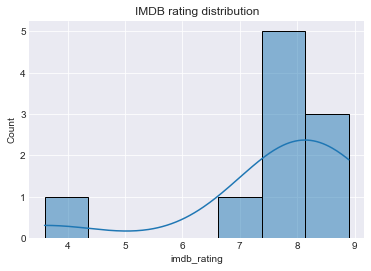

In [16]:
# set style
plt.style.use('seaborn-darkgrid')

# Plot distribution
sns.histplot(cult_classics['imdb_rating'], kde= True)
plt.title('IMDB rating distribution')
plt.show();

In the plot above, the most 

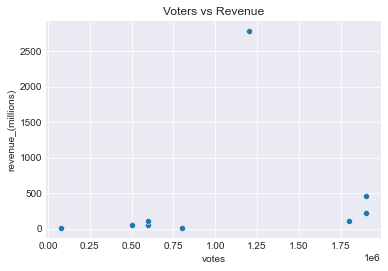

In [17]:
sns.scatterplot(x= 'votes', y= 'revenue_(millions)', data= cult_classics)
plt.title('Voters vs Revenue')
plt.show()

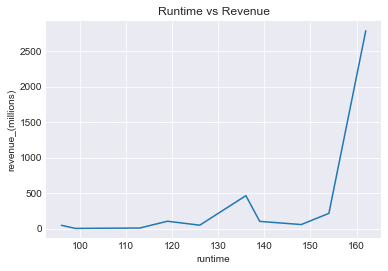

In [18]:
# Runtime vs revenue
sns.lineplot(data= cult_classics, x= 'runtime', y= 'revenue_(millions)')
plt.title('Runtime vs Revenue')
plt.show()

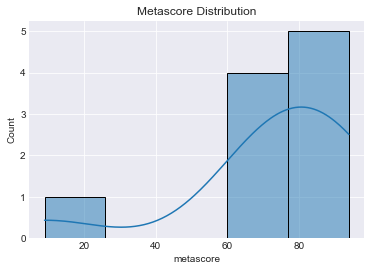

In [19]:
sns.histplot(cult_classics['metascore'], kde= True)
plt.title('Metascore Distribution')
plt.show();

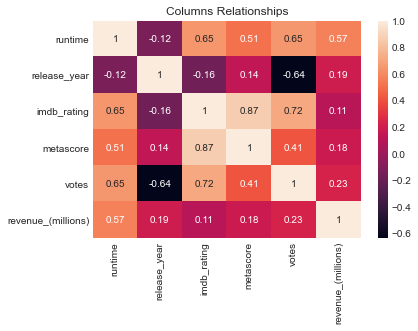

In [20]:
sns.heatmap(cult_classics.corr(), annot= True)
plt.title('Columns Relationships')
plt.show()